# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     805.8
Date:                Fri, 05 May 2023   Prob (F-statistic):           9.43e-40
Time:                        16:27:52   Log-Likelihood:                -3.5123
No. Observations:                  50   AIC:                             15.02
Df Residuals:                      46   BIC:                             22.67
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9681      0.092     53.859      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.45087866  4.93599749  5.38220078  5.76272753  6.06047461  6.27080684
  6.40231846  6.47542117  6.51899051  6.56562173  6.64627444  6.78518608
  6.99588973  7.27899069  7.62206704  8.0017105   8.38737235  8.74638253
  9.04931719  9.27483297  9.41317367  9.46777314  9.45469111  9.39997462
  9.33537861  9.2931486   9.30072289  9.37622453  9.52548371  9.74107992
 10.00356111 10.28463959 10.55183963 10.77383312 10.92558671 10.99247471
 10.97268202 10.87750241 10.7294829  10.55871945 10.39791218 10.27699289
 10.21820735 10.23246036 10.31752413 10.45840431 10.6298035  10.80027757
 10.9374018  11.01309822]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.99507749 10.84687084 10.58773486 10.26155282  9.92609054  9.63885334
  9.44300667  9.35680773  9.3691355   9.4422135 ]


## Plot comparison

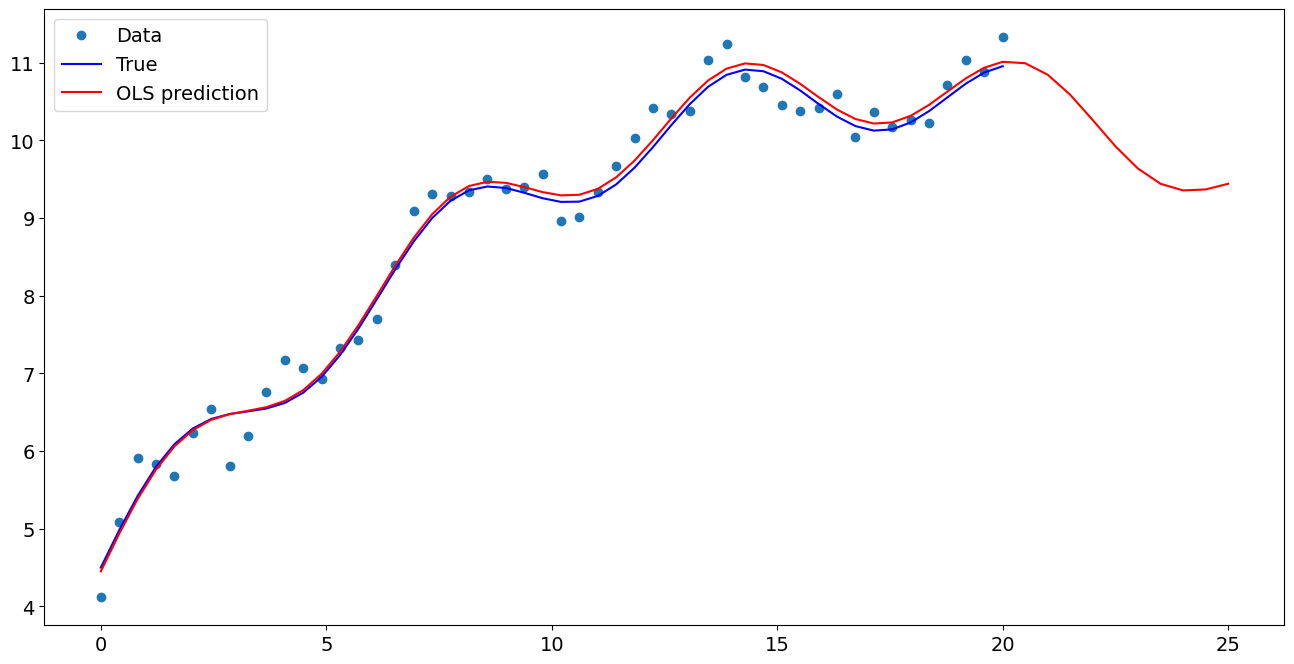

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.968097
x1                  0.512584
np.sin(x1)          0.491036
I((x1 - 5) ** 2)   -0.020689
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.995077
1    10.846871
2    10.587735
3    10.261553
4     9.926091
5     9.638853
6     9.443007
7     9.356808
8     9.369136
9     9.442214
dtype: float64